In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Conv2D, Reshape, MaxPool2D
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import TensorBoard

# Training and Improving Neural Networks - Demo

In [3]:
((train_images, train_classes), (test_images, test_classes)) = mnist.load_data()


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
input_shape = train_images[0].shape
num_classes = len(set(train_classes))

print(input_shape)
print(num_classes)

(28, 28)
10


In [7]:
tf.keras.backend.clear_session()

In [8]:
# kernel_regularizer=L1L2(l1=0.01, l2=0.001),
# bias_regularizer=L1(l1=0.01),
# activity_regularizer=None

model = Sequential([
    Input(input_shape),
    Flatten(),
    # Dense(40, activation="relu"),
    # Dropout(0.02),
    # Dense(30, activation="relu"),
    # Dropout(0.02),
    Dense(20, activation="relu"),
    Dropout(0.9),
    Dense(num_classes, activation="softmax")
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │          15,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,910 (62.15 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam"
)

In [10]:
history = model.fit(
    train_images, 
    train_classes,
    validation_split=0.1,
    epochs=20,
    callbacks=[TensorBoard(update_freq=10)]
)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.7103 - val_loss: 2.3088
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.3191 - val_loss: 2.3017
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.3072 - val_loss: 2.2942
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.3006 - val_loss: 2.2940
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.3012 - val_loss: 2.2937
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.3040 - val_loss: 2.3021
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.3010 - val_loss: 2.3019
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.3013 - val_loss: 2.3021
Epoch 9/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.3020 - val_loss: 2.3021
Epoch 10/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.3010 - val_loss: 2.3021
Epoch 11/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.3012 - val_loss: 2.3019
Epoch 12/20
1688/1688 ━━━━━━━━

In [14]:
new_model = Sequential([
    Input(shape=(20,)),
    Dense(5),
    Dense(10),
    Dense(5),
])

(array([16., 17., 16., 25., 12., 14.]),
 array([-0.47918719, -0.31828848, -0.15738977,  0.00350894,  0.16440766,
         0.32530636,  0.48620507]),
 <BarContainer object of 6 artists>)

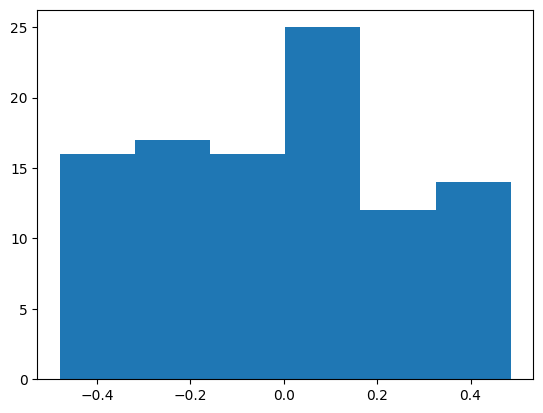

In [26]:
plt.hist(new_model.layers[0].kernel.numpy().ravel(), bins="fd")